<a href="https://colab.research.google.com/github/thanksbinh/student-posts-classifier/blob/main/StudentRequestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
vietnamese_stopwords = [
    'ạ', 'á', 'để', 'đang', 'đã', 'sẽ', 'với', 'và', 'nhé', 'nha', 'nhiều', 'nè',
    'là', 'hoặc', 'của', 'có', 'các', 'cho', 'ơi',
    'thì', 'nếu', 'trong', 'này', 'không', 'nào',
    'mình'
]
vietnamese_stopwords.sort(reverse=True)
print(vietnamese_stopwords)

# https://howtovietnamese.com/vietnamese-text-abbreviations-slang/
chat_words = {
    "a": "anh",
    "c": "chị",
    "cj": "chị",
    "e": "em",
    "ae": "anh_em",
    "ce": "chị_em",
    "ace": "anh_chị_em",
    "b": "bạn",
    "t": "tớ",
    "tui": "tớ",
    # "m": "mày",
    "m": "mình",
    "mk": "mình",
    "mik": "mình",
    "mng": "mọi_người",
    "mn": "mọi_người",
    "ng": "người",
    "namnữ": "nam_nữ",
    "nữnam": "nam_nữ",

    "iu": "yêu",
    "ct": "chia_tay",
    "ny": "người_yêu",
    "vk": "vợ",
    "ck": "chồng",

    "h": "giờ",
    "g": "giờ",
    "p": "phút",
    # "bh": "bây giờ",
    # "bh": "bao giờ",
    "bâyh": "bây giờ",
    "hqua": "hôm_qua",
    "htrc": "hôm_trước",
    "ms": "mới",

    "ib": "inbox",
    "lb": "inbox",
    "ibox": "inbox",
    "nt": "nhắn_tin",
    # "nc": "nói chuyện",
    # "nc": "nói chung",
    # "nch": "nói chuyện",
    # "nch": "nói chung",
    "nchuyen": "nói_chuyện",
    "mún": "muốn",
    "bít": "biết",
    "bik": "biết",
    "cb": "chuẩn_bị",

    "dt": "điện_thoại",
    "đt": "điện_thoại",
    "bt": "bình_thường",
    "bth": "bình_thường",

    "j": "gì",
    "b": "bạn",
    "bn": "bạn",
    "cban": "các bạn",
    "bb": "bạn_bè",
    # "bn": "bao nhiêu",
    "ntn": "như_thế_nào",

    "kh": "không",
    "k": "không",
    "khong": "không",
    "ko": "không",
    "hem": "không",
    "hong": "không",
    "khum": "không",
    # "hok": "không",
    "đc": "được",
    "dc": "được",
    "r": "rồi",
    "nhìu": "nhiều",
    "wá": "quá",
    "cx": "cũng",
    "uk": "ừ",
    "uh": "ừ",
    "ukm": "ừ",
    "g9": "ngủ_ngon",
    "vn": "việt_nam",

    "lquan": "liên_quan",
    "cs": "có",
    "ah": "à",
    "vs": "với",
    # "sn": "sinh năm",
    # "sn": "sinh nhật",
    "ak": "à",
    "ah": "ạ",
    "cmt": "comment",
    "s": "sao",
    "cgi": "cái gì",
    "v": "vậy",
    "lun": "luôn",
    "zới": "với",
    "gr": "group",
    "sl": "số_lượng",
    "ttv": "tuyển thành_viên",
    "tv": "thành_viên",
    # "rcm": "recomment",
    "zl": "zalo",
    "lh": "liên_hệ",
    "ad": "admin",
    "sđt": "số_điện_thoại",
    "đg": "đang",
    "yc": "yêu_cầu",
    "hn": "hà_nội",
    "nma": "nhưng_mà",
    "aii": "ai",

    # "hk1": "học kỳ 1",
    # "hk2": "học kỳ 2",
    # "nv1": "nguyện vọng 1",
    # "khtn": "khoa học tự nhiên",
    # "nlxh": "nghị luận xã hội",
    "hsg": "học_sinh_giỏi",
    "c3": "cấp_3",
    "lp": "lớp",
    "tl": "tài_liệu",
    # "hok": "học",
    "hc": "học",
    "hs": "học_sinh",
    "sv": "sinh_viên",
    "gv": "giáo_viên",
    "onl": "online",
    "off": "offline",
    "sp": "sư_phạm",
    "nn": "ngoại_ngữ",
    "gs": "gia_sư",
    "đh": "đại_học",
}


tone_normalization_dict_map = {
    "òa": "oà",
    "Òa": "Oà",
    "ÒA": "OÀ",
    "óa": "oá",
    "Óa": "Oá",
    "ÓA": "OÁ",
    "ỏa": "oả",
    "Ỏa": "Oả",
    "ỎA": "OẢ",
    "õa": "oã",
    "Õa": "Oã",
    "ÕA": "OÃ",
    "ọa": "oạ",
    "Ọa": "Oạ",
    "ỌA": "OẠ",
    "òe": "oè",
    "Òe": "Oè",
    "ÒE": "OÈ",
    "óe": "oé",
    "Óe": "Oé",
    "ÓE": "OÉ",
    "ỏe": "oẻ",
    "Ỏe": "Oẻ",
    "ỎE": "OẺ",
    "õe": "oẽ",
    "Õe": "Oẽ",
    "ÕE": "OẼ",
    "ọe": "oẹ",
    "Ọe": "Oẹ",
    "ỌE": "OẸ",
    "ùy": "uỳ",
    "Ùy": "Uỳ",
    "ÙY": "UỲ",
    "úy": "uý",
    "Úy": "Uý",
    "ÚY": "UÝ",
    "ủy": "uỷ",
    "Ủy": "Uỷ",
    "ỦY": "UỶ",
    "ũy": "uỹ",
    "Ũy": "Uỹ",
    "ŨY": "UỸ",
    "ụy": "uỵ",
    "Ụy": "Uỵ",
    "ỤY": "UỴ",

    "lí": "lý"
}

['ạ', 'ơi', 'để', 'đã', 'đang', 'á', 'với', 'và', 'trong', 'thì', 'sẽ', 'nếu', 'nè', 'này', 'nào', 'nhé', 'nhiều', 'nha', 'mình', 'là', 'không', 'hoặc', 'của', 'có', 'các', 'cho']


In [2]:
!pip install py_vncorenlp
!pip install emoji

In [3]:
# Import Basis Libraries
import re
import string
import emoji
from collections import defaultdict
import time
import math
import random

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import os
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt

import py_vncorenlp

nltk.download('punkt')

# Automatically download VnCoreNLP components from the original repository
# and save them in some local working folder
# py_vncorenlp.download_model(save_dir="/content/vncorenlp")
model = py_vncorenlp.VnCoreNLP(save_dir='/content/vncorenlp')

def word_segment_wrapper(text):
  return " ".join(model.word_segment(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('/content/data_raw_03.csv')

# rename column
# df.rename(columns = {'label (depression result)':'Sentiment'}, inplace = True)
# df.rename(columns = {'message to examine':'review'}, inplace = True)

# Drop Columns
# df.drop('text',axis=1,inplace=True) # Text is post_text with header

# Drop rows
df.drop_duplicates(subset='post_id', inplace=True)
# df['post_text'] = df['post_text'].fillna('')
df.drop(df[df.post_text != df.post_text].index, inplace=True)

len(df)

<ipython-input-4-2a87796f6a2a>:1: DtypeWarning: Columns (0,3,8,9,10,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data_raw_03.csv')


52354

In [5]:
# Storing Punctuation in a Variable
punc = string.punctuation.replace("?", "")
punc

'!"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'

In [6]:
punc1 = string.punctuation.replace("?", "").replace(".", "").replace(",", "")
punc1

'!"#$%&\'()*+-/:;<=>@[\\]^_`{|}~'

In [18]:
punc2 = string.punctuation.replace("?", "").replace("_", "")
punc2

'!"#$%&\'()*+,-./:;<=>@[\\]^`{|}~'

In [8]:
# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# Here We also Use Regular Expressions to Remove URLs from Text or Whole Corpus.
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

# The code defines a function, remove_punc1, that takes a text input and removes all punctuation characters from it using
# the translate method with a translation table created by str.maketrans. This function effectively cleanses the text of punctuation symbols.
def remove_punc_1(text):
    return text.translate(str.maketrans('', '', punc1))

def remove_punc_2(text):
    return text.translate(str.maketrans('', '', punc2))

In [9]:
# Handle the Spelling Issue.
def vietnamese_tone_normalization(text):
    for i, j in tone_normalization_dict_map.items():
        text = text.replace(i, j)
    return text

def replace11(text):
    return text.replace('1 1', '1_1').replace('1:1', '1_1')

def replace_dgnl(text):
    variations = ["đgnl", "dgnl", "đánh giá năng lực", "đánh_giá năng_lực", "danhgianangluc"]
    new_text = []
    for i in text.split():
        # if i start with either variations
        for variation in variations:
            if variation in i:
                i = i.replace(variation, ' đánh_giá_năng_lực ')

        new_text.append(i.strip())
    return " ".join(new_text)

def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i in chat_words:
            new_text.append(chat_words[i])
        else:
            new_text.append(i)
    return " ".join(new_text)


In [10]:
def remove_stopwords(text):
    new_text = []
    for i in text.split():
        if i not in vietnamese_stopwords:
            new_text.append(i)
    return " ".join(new_text)

def give_emoji_free_text(text):
    clean_text = emoji.replace_emoji(text, replace='')

    return clean_text

def re_remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [11]:
def filter_alnum(text):
    new_text = []
    for i in text.split():
        if i.replace('_', '').isalnum() or i == '?':
            new_text.append(i)
    return " ".join(new_text)

def remove_number_with_3_or_above_digit(text):
    new_text = []
    for i in text.split():
        if not re.search(r'\d{3,}', i):
            new_text.append(i)
    return " ".join(new_text)

In [12]:
df['post_text'] = df['post_text'].apply(replace11) # before remove_punc

In [13]:
df['post_text'] = df['post_text'].apply(remove_url)

df['post_text'] = df['post_text'].apply(vietnamese_tone_normalization)
df['post_text'] = df['post_text'].apply(remove_number_with_3_or_above_digit)

df

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
2,398860735946317,mn ơi cho em xin địa chỉ học một số thầy cô ôn...,NaN,NaN,2024-01-10 15:59:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",37.0,0,0,NaN,Nhi Nhi,https://facebook.com/profile.php?id=1000443182...,False,37.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Nhi Nhi > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên..."
6,399821782516879,Các bác ơi cho em hỏi các bạn chọn trung tâm h...,NaN,NaN,2024-01-12 09:08:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",33.0,0,0,NaN,Phạm Ngân Kim,https://facebook.com/profile.php?id=1000771027...,False,33.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Phạm Ngân Kim > ‎Ôn Thi Vào Lớp 10: Ams, CVA, ..."
8,399432152555842,"Con e năm nay đang học lớp 8, có định hướng th...",NaN,NaN,2024-01-11 16:35:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",24.0,0,0,NaN,Trần Duyên,https://facebook.com/profile.php?id=1000905958...,False,24.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Trần Duyên > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chu..."
9,398850149280709,"Bạn nhà em hiện đang học lớp 6, con rất muốn h...",NaN,NaN,2024-01-10 15:34:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",22.0,0,0,NaN,Hiền Thanh,https://facebook.com/profile.php?id=1000509408...,False,22.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Hiền Thanh > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chu..."
10,398842515948139,"Các bác cho em hỏi có thầy cô nào ôn Toán, Văn...",NaN,NaN,2024-01-10 15:13:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,[None],22.0,0,0,NaN,Hải An,https://facebook.com/motcon.gai.7777019?refid=...,False,22.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Hải An > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72681,1163463241378414,2k10 lưu lại ngay để viết NLXH cho hay nhaaaa ...,NaN,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-4.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về 1 người và văn bản cho...",15.0,0,0,NaN,Hoàng Bảo Quyên,https://facebook.com/profile.php?id=6156204488...,False,15.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Hoàng Bảo Quyên > ‎2K10 ÔN THI VÀO CẤP 3
72682,1160538665004205,"Nhắn y chang gửi vào trang để nhận nha ""Em muố...",Tài liệu học Free\n\nTài liệu học Free\n\nNhắn...,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,"['Có thể là hình ảnh về văn bản', None, None, ...",13.0,0,0,NaN,Trâm Hà,https://facebook.com/profile.php?id=6156047377...,False,13.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Trâm Hà > ‎2K10 ÔN THI VÀO CẤP 3
72685,1162590914798980,"Mình có nhận dạy kèm văn 1_1 ạ, những bạn nào ...",NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/t6...,['https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/...,"[None, None, None]",8.0,0,0,NaN,Người tham gia ẩn danh,NaN,False,8.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Người tham gia ẩn danh > ‎2K10 ÔN THI VÀO CẤP 3
72686,1163664904691581,ni haoo hôm nay t lên bài này để tìm những bạn...,NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-11.fna.fbcdn.net/v/t39....,['https://scontent.fsgn2-11.fna.fbcdn.net/v/t3...,"['Có thể là hình ảnh về văn bản', 'Có thể là h...",7.0,0,0,NaN,Anh Thuw,https://facebook.com/profile.php?id=1000898362...,False,7.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,An

In [15]:
df['post_text'] = df['post_text'].apply(re_remove_emojis)
df['post_text'] = df['post_text'].apply(remove_stopwords) # after re_remove_emojis
df['post_text'] = df['post_text'].apply(filter_alnum) # after re_remove_emojis

In [16]:
df['post_text'] = df['post_text'].apply(remove_punc_1) # before word_segment_wrapper
df['post_text'] = df['post_text'].apply(word_segment_wrapper)
df.tail()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
72681,1163463241378414,2k10 lưu lại ngay viết NLXH hay nhaaaa,NaN,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-4.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về 1 người và văn bản cho...",15.0,0,0,NaN,Hoàng Bảo Quyên,https://facebook.com/profile.php?id=6156204488...,False,15.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Hoàng Bảo Quyên > ‎2K10 ÔN THI VÀO CẤP 3
72682,1160538665004205,Nhắn y_chang gửi vào trang nhận Em muốn nhận t...,Tài liệu học Free\n\nTài liệu học Free\n\nNhắn...,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,"['Có thể là hình ảnh về văn bản', None, None, ...",13.0,0,0,NaN,Trâm Hà,https://facebook.com/profile.php?id=6156047377...,False,13.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Trâm Hà > ‎2K10 ÔN THI VÀO CẤP 3
72685,1162590914798980,Mình nhận dạy kèm văn 1 _ 1 những bạn muốn thi...,NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/t6...,['https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/...,"[None, None, None]",8.0,0,0,NaN,Người tham gia ẩn danh,NaN,False,8.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Người tham gia ẩn danh > ‎2K10 ÔN THI VÀO CẤP 3
72686,1163664904691581,ni haoo hôm_nay t lên bài tìm những bạn muốn h...,NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-11.fna.fbcdn.net/v/t39....,['https://scontent.fsgn2-11.fna.fbcdn.net/v/t3...,"['Có thể là hình ảnh về văn bản', 'Có thể là h...",7.0,0,0,NaN,Anh Thuw,https://facebook.com/profile.php?id=1000898362...,False,7.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Anh Thuw > ‎2K10 ÔN THI VÀO CẤP 3
72688,1164014541323284,một phút nói thật,NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-7.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-7.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về 2 người, tóc mái và vă...",6.0,0,0,NaN,Huy Nguyễn Quốc,https://facebook.com/profile.php?id=1000491992...,False,6.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Huy Nguyễn Quốc > ‎2K10 ÔN THI VÀO CẤP 3


In [19]:
df['post_text'] = df['post_text'].str.lower() # after word_segment_wrapper, before most

df['post_text'] = df['post_text'].apply(replace_dgnl) # after word_segment_wrapper
df['post_text'] = df['post_text'].apply(remove_punc_2) # after word_segment_wrapper

df['post_text'] = df['post_text'].apply(chat_conversion) # todo: check
df['post_text'] = df['post_text'].apply(remove_stopwords) # after chat_conversion

df

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
2,398860735946317,mọi_người em xin địa_chỉ học một_số thầy_cô ôn...,NaN,NaN,2024-01-10 15:59:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",37.0,0,0,NaN,Nhi Nhi,https://facebook.com/profile.php?id=1000443182...,False,37.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Nhi Nhi > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên..."
6,399821782516879,bác em hỏi bạn chọn trung_tâm hay chỗ con học ...,NaN,NaN,2024-01-12 09:08:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",33.0,0,0,NaN,Phạm Ngân Kim,https://facebook.com/profile.php?id=1000771027...,False,33.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Phạm Ngân Kim > ‎Ôn Thi Vào Lớp 10: Ams, CVA, ..."
8,399432152555842,con em năm nay học lớp 8 định_hướng thi vào 10...,NaN,NaN,2024-01-11 16:35:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",24.0,0,0,NaN,Trần Duyên,https://facebook.com/profile.php?id=1000905958...,False,24.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Trần Duyên > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chu..."
9,398850149280709,bạn nhà em hiện học lớp 6 con rất muốn học tiế...,NaN,NaN,2024-01-10 15:34:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",22.0,0,0,NaN,Hiền Thanh,https://facebook.com/profile.php?id=1000509408...,False,22.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Hiền Thanh > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chu..."
10,398842515948139,bác em hỏi thầy_cô ôn toán_văn_anh khu_vực nhổ...,NaN,NaN,2024-01-10 15:13:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,[None],22.0,0,0,NaN,Hải An,https://facebook.com/motcon.gai.7777019?refid=...,False,22.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Hải An > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72681,1163463241378414,2k10 lưu lại ngay viết nlxh hay nhaaaa,NaN,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-4.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về 1 người và văn bản cho...",15.0,0,0,NaN,Hoàng Bảo Quyên,https://facebook.com/profile.php?id=6156204488...,False,15.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Hoàng Bảo Quyên > ‎2K10 ÔN THI VÀO CẤP 3
72682,1160538665004205,nhắn y_chang gửi vào trang nhận em muốn nhận t...,Tài liệu học Free\n\nTài liệu học Free\n\nNhắn...,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,"['Có thể là hình ảnh về văn bản', None, None, ...",13.0,0,0,NaN,Trâm Hà,https://facebook.com/profile.php?id=6156047377...,False,13.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Trâm Hà > ‎2K10 ÔN THI VÀO CẤP 3
72685,1162590914798980,nhận dạy kèm văn 1 _ 1 những bạn muốn thi học_...,NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/t6...,['https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/...,"[None, None, None]",8.0,0,0,NaN,Người tham gia ẩn danh,NaN,False,8.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Người tham gia ẩn danh > ‎2K10 ÔN THI VÀO CẤP 3
72686,1163664904691581,ni haoo hôm_nay tớ lên bài tìm những bạn muốn ...,NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-11.fna.fbcdn.net/v/t39....,['https://scontent.fsgn2-11.fna.fbcdn.net/v/t3...,"['Có thể là hình ảnh về văn bản', 'Có thể là h...",7.0,0,0,NaN,Anh Thuw,https://facebook.com/profile.php?id=1000898362...,False,7.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Anh Thuw > ‎2K10 ÔN THI 

In [20]:
df['tokens'] = df['post_text'].apply(word_tokenize)

# short_posts = rows with less than 3 tokens
short_posts = df[df['tokens'].apply(len) < 3]
short_posts.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header,tokens
772,566365375862518,chịu thật,NaN,NaN,2024-10-08 17:55:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['Có thể là hình ảnh về 7 người và văn bản', N...",40.0,0,0,NaN,Nguyễn Phượng,https://facebook.com/profile.php?id=1000439594...,False,40.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Nguyễn Phượng > ‎Ôn Thi Vào Lớp 10: Ams, CVA, ...","[chịu, thật]"
1233,550933067405749,,NaN,NaN,2024-09-17 19:18:00,https://scontent-hkg4-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-2.xx.fbcdn.net/v/t39.3...,"['Có thể là hình ảnh về văn bản', None, None]",50.0,0,0,NaN,Nguyễn Bình,https://facebook.com/profile.php?id=1000777967...,False,50.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Nguyễn Bình > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Ch...",[]
1946,486832437149146,đề,NaN,NaN,2024-06-08 17:36:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",19.0,0,0,NaN,Đinh Nguyễn Ngọc Lan,https://facebook.com/ngoclandinh89?refid=18&_f...,False,19.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,Đinh Nguyễn Ngọc Lan > ‎Ôn Thi Vào Lớp 10: Ams...,[đề]
1951,486822057150184,mã,NaN,NaN,2024-06-08 17:11:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",46.0,0,0,NaN,Đinh Nguyễn Ngọc Lan,https://facebook.com/ngoclandinh89?refid=18&_f...,False,46.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,Đinh Nguyễn Ngọc Lan > ‎Ôn Thi Vào Lớp 10: Ams...,[mã]
1954,486826670483056,mã,NaN,NaN,2024-06-08 17:22:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",9.0,0,0,NaN,Đinh Nguyễn Ngọc Lan,https://facebook.com/ngoclandinh89?refid=18&_f...,False,9.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,Đinh Nguyễn Ngọc Lan > ‎Ôn Thi Vào Lớp 10: Ams...,[mã]


In [21]:
# Drop rows with less than 3 tokens
df.drop(df[df['tokens'].apply(len) < 3].index, inplace=True)
df

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header,tokens
2,398860735946317,mọi_người em xin địa_chỉ học một_số thầy_cô ôn...,NaN,NaN,2024-01-10 15:59:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",37.0,0,0,NaN,Nhi Nhi,https://facebook.com/profile.php?id=1000443182...,False,37.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Nhi Nhi > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...","[mọi_người, em, xin, địa_chỉ, học, một_số, thầ..."
6,399821782516879,bác em hỏi bạn chọn trung_tâm hay chỗ con học ...,NaN,NaN,2024-01-12 09:08:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",33.0,0,0,NaN,Phạm Ngân Kim,https://facebook.com/profile.php?id=1000771027...,False,33.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Phạm Ngân Kim > ‎Ôn Thi Vào Lớp 10: Ams, CVA, ...","[bác, em, hỏi, bạn, chọn, trung_tâm, hay, chỗ,..."
8,399432152555842,con em năm nay học lớp 8 định_hướng thi vào 10...,NaN,NaN,2024-01-11 16:35:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",24.0,0,0,NaN,Trần Duyên,https://facebook.com/profile.php?id=1000905958...,False,24.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Trần Duyên > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chu...","[con, em, năm, nay, học, lớp, 8, định_hướng, t..."
9,398850149280709,bạn nhà em hiện học lớp 6 con rất muốn học tiế...,NaN,NaN,2024-01-10 15:34:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None]",22.0,0,0,NaN,Hiền Thanh,https://facebook.com/profile.php?id=1000509408...,False,22.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Hiền Thanh > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chu...","[bạn, nhà, em, hiện, học, lớp, 6, con, rất, mu..."
10,398842515948139,bác em hỏi thầy_cô ôn toán_văn_anh khu_vực nhổ...,NaN,NaN,2024-01-10 15:13:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,[None],22.0,0,0,NaN,Hải An,https://facebook.com/motcon.gai.7777019?refid=...,False,22.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Hải An > ‎Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên ...","[bác, em, hỏi, thầy_cô, ôn, toán_văn_anh, khu_..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72681,1163463241378414,2k10 lưu lại ngay viết nlxh hay nhaaaa,NaN,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-4.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về 1 người và văn bản cho...",15.0,0,0,NaN,Hoàng Bảo Quyên,https://facebook.com/profile.php?id=6156204488...,False,15.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Hoàng Bảo Quyên > ‎2K10 ÔN THI VÀO CẤP 3,"[2k10, lưu, lại, ngay, viết, nlxh, hay, nhaaaa]"
72682,1160538665004205,nhắn y_chang gửi vào trang nhận em muốn nhận t...,Tài liệu học Free\n\nTài liệu học Free\n\nNhắn...,NaN,2024-08-13 14:35:00,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,"['Có thể là hình ảnh về văn bản', None, None, ...",13.0,0,0,NaN,Trâm Hà,https://facebook.com/profile.php?id=6156047377...,False,13.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Trâm Hà > ‎2K10 ÔN THI VÀO CẤP 3,"[nhắn, y_chang, gửi, vào, trang, nhận, em, muố..."
72685,1162590914798980,nhận dạy kèm văn 1 _ 1 những bạn muốn thi học_...,NaN,NaN,2024-08-13 11:30:00,https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/t6...,['https://scontent.fsgn2-3.fna.fbcdn.net/m1/v/...,"[None, None, None]",8.0,0,0,NaN,Người tham gia ẩn danh,NaN,False,8.0,"[{'name': '2K10 ÔN THI VÀO CẤP 3', 'link': 'ht...",False,Người tham gia ẩn danh > ‎2K10 ÔN THI VÀO CẤP 3,"[nhận, dạy, kèm, văn, 1, _, 1, những, bạn,

In [22]:
df.to_csv('/content/cleaned-data.csv', index=False)

In [35]:
# df = pd.read_csv('/content/cleaned-data.csv')

df[df['post_text'].str.contains(' đánh_giá_năng_lực ')]

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header,tokens
2758,504583405374049,xin phép admin chào bố_mẹ thầy mở lớp_học bổ_t...,NaN,NaN,2024-07-18 01:05:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,[None],2.0,0,0,NaN,Nguyễn Sơn Lâm,https://facebook.com/thaysonlamdayhoa?refid=18...,False,2.0,"[{'name': 'Ôn Thi Vào Lớp 10: Ams, CVA, Chuyên...",False,"Nguyễn Sơn Lâm > ‎Ôn Thi Vào Lớp 10: Ams, CVA,...","[xin, phép, admin, chào, bố_mẹ, thầy, mở, lớp_..."
3080,524803026680556,sách ôn thi tn ôn đánh_giá_năng_lực mới phát_hành,NaN,NaN,2024-09-09 05:22:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"['Có thể là hình ảnh về văn bản', 'Có thể là h...",1.0,0,0,NaN,Ngọc Kiều,https://facebook.com/kieu.ngoc.98499?refid=18&...,False,1.0,"[{'name': '2k10 học sinh giỏi 🏆🥇', 'link': 'ht...",False,Ngọc Kiều > ‎2k10 học sinh giỏi 🏆🥇,"[sách, ôn, thi, tn, ôn, đánh_giá_năng_lực, mới..."
3751,1132524588199264,chị tuyển_sinh lớp đánh_giá_năng_lực đợt 2,NaN,NaN,2024-03-06 16:58:00,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,['Không có mô tả ảnh.'],NaN,0,0,NaN,Mỹ Duyên,https://facebook.com/profile.php?id=6155372442...,False,NaN,"[{'name': 'ĐẤU TRƯỜNG HỌC TẬP 2K7, 2K8, 2K9, 2...",False,"Mỹ Duyên > ‎ĐẤU TRƯỜNG HỌC TẬP 2K7, 2K8, 2K9, ...","[chị, tuyển_sinh, lớp, đánh_giá_năng_lực, đợt, 2]"
3769,1131909521594104,full bộ ebook ôn đánh_giá_năng_lực link sách h...,NaN,NaN,2024-03-05 21:00:00,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",3.0,0,0,https://s.net.vn/W8pW?fbclid=IwZXh0bgNhZW0CMTE...,Ở đâyy có nhiều tài liệu học tập chill chill,https://facebook.com/Tailieuonthi3107?refid=18...,False,3.0,"[{'name': 'ĐẤU TRƯỜNG HỌC TẬP 2K7, 2K8, 2K9, 2...",False,Ở đâyy có nhiều tài liệu học tập chill chill >...,"[full, bộ, ebook, ôn, đánh_giá_năng_lực, link,..."
3876,1129252961859760,bộ đề phát_triển từ đề đánh_giá_năng_lực đhsp ...,NaN,NaN,2024-03-01 09:00:00,https://scontent.fsgn2-7.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-7.fna.fbcdn.net/v/t39...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",3.0,0,0,https://drive.google.com/file/d/1LFEEtfMC2QF7F...,Ở đâyy có nhiều tài liệu học tập chill chill,https://facebook.com/Tailieuonthi3107?refid=18...,False,3.0,"[{'name': 'ĐẤU TRƯỜNG HỌC TẬP 2K7, 2K8, 2K9, 2...",False,Ở đâyy có nhiều tài liệu học tập chill chill >...,"[bộ, đề, phát_triển, từ, đề, đánh_giá_năng_lực..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69739,2302271323449902,khoá học qua drive chào_mừng 2k7ers combo luyệ...,NaN,NaN,2024-08-14 07:22:00,https://scontent.fsgn2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-4.fna.fbcdn.net/v/t39...,"['Có thể là hình ảnh về văn bản', 'Có thể là h...",NaN,0,0,NaN,Đạt Đạt,https://facebook.com/profile.php?id=1000770168...,False,NaN,[{'name': 'Cộng Đồng 2k7 - Quyết Tâm Đỗ Đại Họ...,False,Đạt Đạt > ‎Cộng Đồng 2k7 - Quyết Tâm Đỗ Đại Học,"[khoá, học, qua, drive, chào_mừng, 2k7ers, com..."
69747,2302027843474250,share đánh_giá_năng_lực hcm empire,NaN,NaN,2024-08-13 23:58:00,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về văn bản cho biết 'aceb...",NaN,0,0,NaN,Trần Thảo,https://facebook.com/profile.php?id=1000562772...,False,NaN,[{'name': 'Cộng Đồng 2k7 - Quyết Tâm Đỗ Đại Họ...,False,Trần Thảo > ‎Cộng Đồng 2k7 - Quyết Tâm Đỗ Đại Học,"[share, đánh_giá_năng_lực, hcm, empire]"
69768,2301860690157632,khoá học qua drive chào_mừng 2k7ers combo luyệ...,NaN,NaN,2024-08-13 20:17:00,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,"['

In [24]:
dictionary = defaultdict(int)

def extract_dictionary_paddle(token):
    dictionary[token] += 1

    return dictionary

In [25]:
for i, row in df.iterrows():
    tokens = row['tokens']
    for token in tokens:
        extract_dictionary_paddle(token)

In [26]:
dicDf = pd.DataFrame(dictionary.items(), columns=['word', 'count'])
dicDf = dicDf[dicDf['count'] > 1]
dicDf.sort_values(by=['count'], ascending=False)

,word,count
4,học,26258
26,bạn,19362
1,em,14900
8,thi,13665
15,anh,13102
...,...,...
22363,hay_dở,2
11818,đc_trần_phú_hà,2
11819,đông_đt,2
22355,b0,2


In [27]:
dicDf.to_csv('/content/dicDf.csv', index=False)

In [28]:
texts = df['post_text'].tolist()

In [29]:
vectorizer = TfidfVectorizer(
    # max_df=0.5,
    min_df=5
)
t0 = time.time()

X = vectorizer.fit_transform(texts)

print(f"vectorization done in {time.time() - t0:.3f} s")
print(f"n_samples: {X.shape[0]}, n_features: {X.shape[1]}")

vectorization done in 1.282 s
n_samples: 48594, n_features: 7039


In [30]:
# from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
# from sklearn.pipeline import make_pipeline
# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import Normalizer

# lsa_vectorizer = make_pipeline(
#     HashingVectorizer(n_features=50_000),
#     TfidfTransformer(),
#     TruncatedSVD(n_components=100, random_state=0),
#     Normalizer(copy=False),
# )

# t0 = time.time()
# X_hashed_lsa = lsa_vectorizer.fit_transform(texts)
# print(f"vectorization done in {time.time() - t0:.3f} s")

In [31]:
print(f"{X.nnz / np.prod(X.shape):.3f}")

0.002


In [32]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import Normalizer

# lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
# t0 = time.time()
# X_lsa = lsa.fit_transform(X)
# explained_variance = lsa[0].explained_variance_ratio_.sum()

# print(f"LSA done in {time.time() - t0:.3f} s")
# print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

In [66]:
number_of_clusters = 13

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model = KMeans(n_clusters=number_of_clusters,
               init='k-means++',
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=5)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

label = model.fit_predict(X)
# label = model.fit_predict(X_lsa)

silhouette_avg = silhouette_score(X, label)
print("For n_clusters =", number_of_clusters,
      "The average silhouette_score is :", silhouette_avg)

# # Compute the silhouette scores for each sample
# sample_silhouette_values = silhouette_samples(X, label)
# print("sample_silhouette_values:", sample_silhouette_values)

# For n_clusters = 8 The average silhouette_score is : 0.022055678273926706
# For n_clusters = 9 The average silhouette_score is : 0.023963791627270695
# For n_clusters = 13 The average silhouette_score is : 0.029032926316117737

For n_clusters = 13 The average silhouette_score is : 0.029032926316117737


In [65]:
range_n_clusters = range(6, 15)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=5)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    # sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # print(sample_silhouette_values)

# For n_clusters = 8 The average silhouette_score is : 0.022055678273926706
# For n_clusters = 9 The average silhouette_score is : 0.024122623501794244


For n_clusters = 6 The average silhouette_score is : 0.01813608319017416
For n_clusters = 7 The average silhouette_score is : 0.02003005504106575
For n_clusters = 8 The average silhouette_score is : 0.021735491562277293
For n_clusters = 9 The average silhouette_score is : 0.0221663226181481
For n_clusters = 10 The average silhouette_score is : 0.02187663377822148
For n_clusters = 11 The average silhouette_score is : 0.02758404523876197
For n_clusters = 12 The average silhouette_score is : 0.024399625490431783
For n_clusters = 13 The average silhouette_score is : 0.030282753383123494
For n_clusters = 14 The average silhouette_score is : 0.029681609844458934


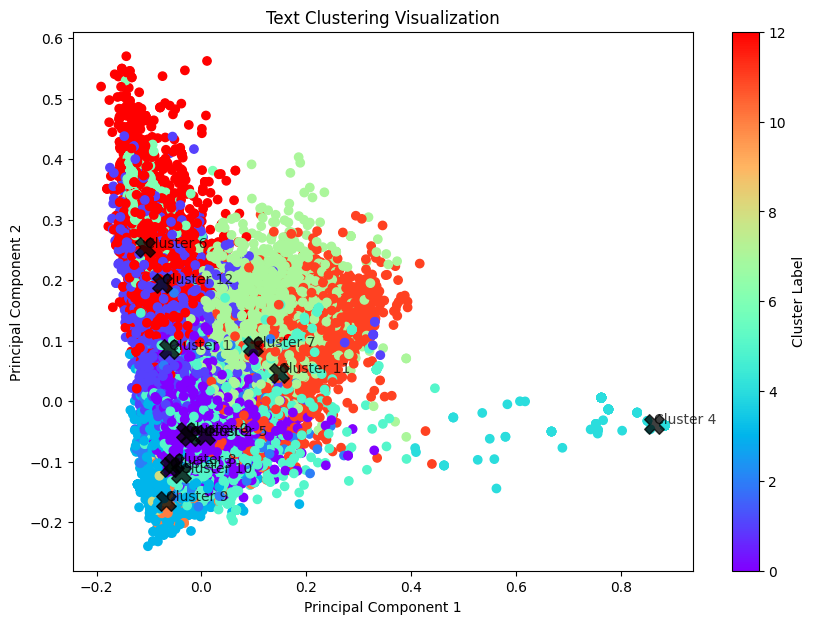

In [67]:
# Step 6: Visualization

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())
# X_reduced = pca.fit_transform(X_hashed_lsa)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=model.labels_, cmap='rainbow')
plt.title("Text Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding cluster centers to the plot
centers = model.cluster_centers_
centers_reduced = pca.transform(centers)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='black', s=200, alpha=0.75, marker='X')

# Adding labels to the plot
# for i, txt in enumerate(texts):
#     plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(number_of_clusters):
    plt.annotate(
        # ' '.join([terms[ind] for ind in order_centroids[i, :10]]),
        "Cluster %d" % (i),
        (centers_reduced[i, 0], centers_reduced[i, 1]),
        fontsize=10,
        alpha=0.75)


plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [68]:
for i in range(number_of_clusters):
    print("Cluster %d:" % (i)),
    print(', '.join([terms[ind] for ind in order_centroids[i, :20]]))

Cluster 0:
bạn, ai, học, anh, được, gì, thi, mọi_người, bài, người, toán, rồi, điểm, học_sinh, văn, vậy, 10, mà, vào, đi
Cluster 1:
em, học, thi, xin, dạy, lớp, cảm_ơn, người, muốn, tìm, năm, chuyên, mọi, toán, anh, môn, giúp, mọi_người, ôn, hỏi
Cluster 2:
2k7, thầy, khoá, học, 12, toán, mới, thi, hoá, em, chương_trình, đánh_giá_năng_lực, cô, xuất_phát, nhóm, lý, tại, văn, sớm, sách
Cluster 3:
đề, thi, đáp_án, thử, môn, vào, sở, https, lịch_sử, năm, toán, 10, vv, xin, thpt, ai, học_kì, drivegooglecom, nhắn_tin, giữa
Cluster 4:
photo, chúc, chấm, duyệt, admin, học, dễ, gửi, mong, file, tốt, đi, bài, tớ, bạn, em, anh, lí_thuyết, tóm_tắt, sinh_học
Cluster 5:
chị, inbox, tài_liệu, cần, file, ai, nhận, bạn, free, tặng, gửi, anh, sách, full, muốn, môn, comment, em, 2k7, học
Cluster 6:
nữ, tuần, yêu_cầu, gia_sư, 1tgs, toán, sinh_viên, anh, dạy, lớp, tiếng, nam_nữ, buổi, 2b, 1b, thành_viên, cập_nhật, tuyển, nhà, kèm
Cluster 7:
học, bạn, tìm, cùng, chung, muốn, nhau, khối, cần, được, thể, cũng,

In [72]:
cluster_labels = [
                  "0. Khác",
                  "1. Tìm giáo viên",
                  "2. Quảng cáo giáo viên, lớp học",
                  "3. Đề thi, tài liệu",
                  "4. Chúc thi tốt",
                  "5. Chị share tài liệu",
                  "6. Trung tâm tìm giáo viên",
                  "7. Tìm bạn học chung",
                  "8. Quảng cáo trung tâm",
                  "9. Đề thi, tài liệu",
                  "10. Quảng cáo trung tâm",
                  "11. Tìm bạn học chung",
                  "12. Tìm-nhận gia sư tiếng anh (online)"
                ]

# "7. Tìm bạn học chung",
# "5. Tìm-nhận gia sư",
# "0. Trung tâm tìm học sinh",
# "4. Gia sư tìm học sinh (online)",
# "1. Chị share tài liệu",
# "3. Đề thi, tài liệu",
# "2. Chúc thi tốt",
# '5. Quảng cáo trung tâm',
# '8. Tuyển thành viên',
# '9. Tìm thầy cô',
# '10. Tìm người kèm',
# '7. Hỏi giúp giải bài tập',
# '3. Quảng cáo bản thân',
# '4. Không học được',

In [84]:
testIndex1 = math.floor(random.random() * len(texts))
testIndex2 = math.floor(random.random() * len(texts))
testIndex3 = math.floor(random.random() * len(texts))

text1 = texts[testIndex1]
text2 = texts[testIndex2]
text3 = texts[testIndex3]

X1 = vectorizer.transform([text1])
cluster1 = model.predict(X1)[0]
print (testIndex1, text1)
print("-> belongs to cluster " + cluster_labels[cluster1])

print()
X2 = vectorizer.transform([text2])
cluster2 = model.predict(X2)[0]
print (testIndex2, text2)
print("-> belongs to cluster " + cluster_labels[cluster2])

print()
X3 = vectorizer.transform([text3])
cluster3 = model.predict(X3)[0]
print (testIndex3, text3)
print("-> belongs to cluster " + cluster_labels[cluster3])


32721 cần tìm bạn ôn chung tiếng anh kiểm_tra đầu_vào đại_học ôn thi chứng_chỉ mos chủ_yếu học buổi tối bằng hình_thức call mes or gg meet bạn nhu_cầu học chung inbox
-> belongs to cluster 7. Tìm bạn học chung

38159 mọi_người hỏi toán khá yếu chắc chỉ ở mức 5 mỗi lần thi chỉ được quanh_quẩn 555 những dạng một_số câu làm được nhưng chỉ cần vài câu biến_thể đi 1 chút lại làm được khi bạn_bè chỉ đánh_giá độ khó câu đó chỉ ở mức 65 thấy học khá máy_móc hiểu bản_chất nên chỉ cần vài chi_tiết nhỏ thay_đổi cũng bị bối_rối muốn hỏi mấy bạn học giỏi nên học lại toàn_bộ từ đầu hay luyện đề quá_trình luyện đề học
-> belongs to cluster 7. Tìm bạn học chung

8678 mọi người em hỏi bên gia_sư quốc_đạt uy_tín em cảm_ơn
-> belongs to cluster 1. Tìm giáo viên


In [85]:
# prompt: create a dataframe from df, contain post_id, post_text and cluster_label

df['cluster_label'] = model.labels_
new_df = df[['post_id', 'post_text', 'cluster_label']]

new_df = new_df[new_df['cluster_label'].isin([7,11])]
new_df = new_df[~new_df['post_text'].str.contains('thành_viên|tuyển_sinh|tuyển sinh|học_viên')]

new_df

,post_id,post_text,cluster_label
27,477687841396939,bạn nhà em 2k10 học toán văn ổn tiếng anh ở mứ...,7
80,473717815127275,ôn thi vào ntt ở đây bạn cùng thi vào ntt học ...,7
173,464332172732506,ở định_công muốn con thi chuyên ngữ cháu học l...,7
239,456262243539499,muốn tìm cô_giáo dạy_học 11 tại gia_đình nhà c...,7
287,457696170062773,bạn nhà học lệch chưa chăm_chỉ lớp 6 7 đều đượ...,7
...,...,...,...
72431,1178882803169791,tại_sao tớ cần 1 lời giải_thích,11
72451,1177056533352418,tớ hỏi bài tớ làm đúng ạđề bài kêu dùng định_n...,11
72457,1089229638801775,vào ibaddvào học cùng chto nhaa,7
72632,1169349244123147,hi mọi người lên đây tìm 1 bạn kèm khoa_học tư...,7
